In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [6]:
import sys
sys.path.append('../')
import numpy as np
import cv2 as cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt
from utility import segmentation_utils
from utility import util


### Загрузим изображение

In [3]:
image = cv.imread('lab5.png')
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

### Основанные на регионах (Region-based) Метод деления (Split segmentation)


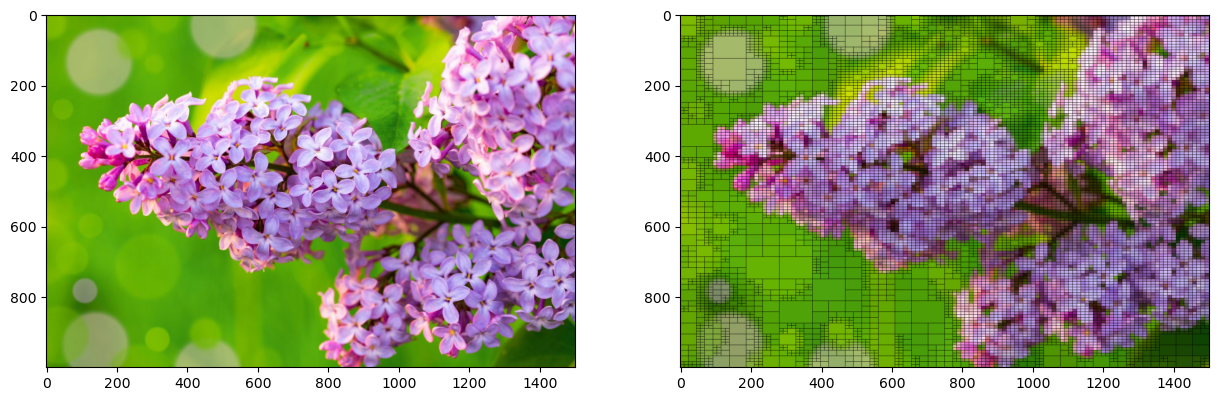

In [5]:
qt = segmentation_utils.QTree(stdThreshold = 0.25, minPixelSize = 4,img = image.copy()) 
qt.subdivide()
tree_image = qt.render_img(thickness=1, color=(0,0,0))

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(tree_image, cv.COLOR_BGR2RGB))
plt.show()


K-средних

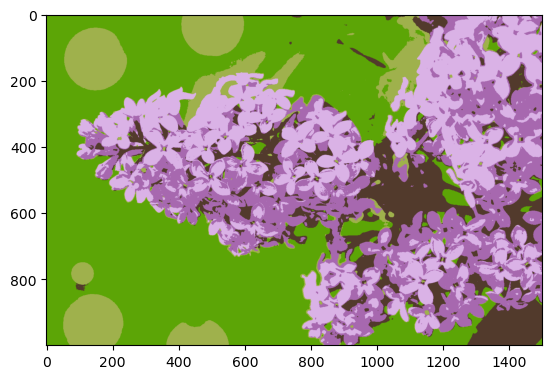

In [23]:
from sklearn.cluster import KMeans

image = cv2.imread("lab5.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


pixels = image_rgb.reshape(-1, 3)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)

labels = kmeans.predict(pixels)

segmented_image = labels.reshape(image_rgb.shape[:2])
colors = kmeans.cluster_centers_
segmented_image_colored = colors[segmented_image].astype(np.uint8)

plt.imshow(segmented_image_colored)